# 03 - Xarray y NetCDF

Abriremos el archivo sintético `data/wrfout_sample.nc` incluido en el repositorio.

In [ ]:
# Celda de instalación (Colab)
try:
    import google.colab
    !pip install -r https://raw.githubusercontent.com/jpantojac/wrf-course/main/requirements_colab.txt

except Exception:
    pass

### ¿Qué es un archivo NetCDF?
Los archivos NetCDF (Network Common Data Form) son un formato estándar muy usado para almacenar datos científicos multidimensionales y etiquetados, como variables meteorológicas o climáticas en modelos numéricos y observaciones satelitales.

Permite guardar datos con dimensiones como tiempo, latitud, longitud, nivel vertical y variables múltiples.

Almacena metadatos: nombre de variables, unidades, atributos, coordenadas.

Facilita el intercambio y análisis reproducible de datos.

Es ampliamente compatible con muchas herramientas y lenguajes.

**Estructura de un archivo NetCDF**

Un NetCDF consta principalmente de:

Variables: arreglos de datos que representan campos físicos (temperatura, viento, humedad).

Dimensiones: ejes de los arreglos (tiempo, lat, lon, altura).

Coordenadas: valores con significado físico para cada dimensión (fechas, grados).

Atributos: metadatos descriptivos (unidades, leyendas).

Grupos (opcional): contenedores jerárquicos para organizar variables y dimensiones.

In [ ]:
url = "https://github.com/jpantojac/wrf-course/raw/main/data/wrfout_sample.nc"

!wget -O wrfout_sample.nc $url

import xarray as xr
ds = xr.open_dataset('wrfout_sample.nc')

In [1]:
import xarray as xr
ds = xr.open_dataset('../data/wrfout_sample.nc')
print(ds)

<xarray.Dataset> Size: 888B
Dimensions:  (lat: 5, lon: 5, time: 1)
Coordinates:
  * lat      (lat) float64 40B -4.0 0.0 4.0 8.0 12.0
  * lon      (lon) float64 40B -78.0 -75.0 -72.0 -69.0 -66.0
  * time     (time) datetime64[ns] 8B 2025-10-01
Data variables:
    T2       (time, lat, lon) float64 200B ...
    U10      (time, lat, lon) float64 200B ...
    V10      (time, lat, lon) float64 200B ...
    RAINNC   (time, lat, lon) float64 200B ...
Attributes:
    title:    WRF sample synthetic dataset


## Selección y operaciones

In [2]:
# Seleccionar T2 y calcular media espacial
T2 = ds['T2']
print('Dimensiones:', T2.dims)
print('Media global (K):', float(T2.mean()))
# Convertir a C
T2_c = T2 - 273.15
print('Media global (C):', float(T2_c.mean()))

Dimensiones: ('time', 'lat', 'lon')
Media global (K): 282.68247057607755
Media global (C): 9.532470576077605


In [3]:
# Extraer una lon/lat específica (index-based)
val = T2.isel(time=0, lat=2, lon=2)
print('Valor en celda central (K):', float(val))

Valor en celda central (K): 282.36242611612965


In [ ]:
url = "https://github.com/jpantojac/wrf-course/blob/main/data/wrfout_d01_2025-11-12_17-00-00"

!wget -O wrfout_d01_2025-11-12_17-00-00.nc $url

import xarray as xr
ds = xr.open_dataset('wrfout_d01_2025-11-12_17-00-00.nc')

In [ ]:
import xarray as xr

# Abrir un archivo NetCDF local (ejemplo 'wrfout_d01_2025-11-01.nc')
#ds = xr.open_dataset("../data/wrfout_d01_2025-11-12_17-00-00")

# Mostrar estructura general del dataset: variables, dimensiones y coordenadas
print(ds)

# Mostrar la lista de variables disponibles
print("Variables en el dataset:", list(ds.data_vars))

# Inspeccionar las dimensiones del dataset
print("Dimensiones:", ds.dims)

# Consultar coordenadas (valores que etiquetan eje temporal, espacial, etc.)
print("Coordenadas:", ds.coords)

# Extraer un DataArray de temperatura a 2 metros (variable "T2")
t2 = ds["T2"]
print(t2)

# Mostrar metadatos de la variable T2
print("Atributos de T2:", t2.attrs)


<xarray.Dataset> Size: 231MB
Dimensions:    (Time: 1, south_north: 325, west_east: 299, bottom_top_stag: 42,
                bottom_top: 41, west_east_stag: 300, south_north_stag: 326)
Coordinates:
    XLAT       (Time, south_north, west_east) float32 389kB ...
    XLONG      (Time, south_north, west_east) float32 389kB ...
    XTIME      (Time) datetime64[ns] 8B ...
    XLAT_U     (Time, south_north, west_east_stag) float32 390kB ...
    XLONG_U    (Time, south_north, west_east_stag) float32 390kB ...
    XLAT_V     (Time, south_north_stag, west_east) float32 390kB ...
    XLONG_V    (Time, south_north_stag, west_east) float32 390kB ...
Dimensions without coordinates: Time, south_north, west_east, bottom_top_stag,
                                bottom_top, west_east_stag, south_north_stag
Data variables: (12/26)
    Times      (Time) |S19 19B ...
    HGT        (Time, south_north, west_east) float32 389kB ...
    PH         (Time, bottom_top_stag, south_north, west_east) float32 16MB

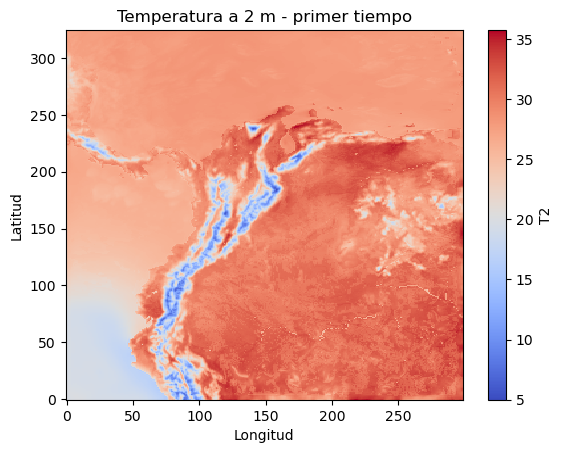

In [7]:
import matplotlib.pyplot as plt

# Convertir T2 de Kelvin a Celsius para interpretar mejor
t2_c = t2 - 273.15

# Seleccionar la primer instante temporal, para graficar un mapa espacial
t2_c_0 = t2_c.isel(Time=0)

# Graficar mapa de temperatura a 2 metros
t2_c_0.plot(cmap="coolwarm")
plt.title("Temperatura a 2 m - primer tiempo")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


campo vectorial de viento a 10 m

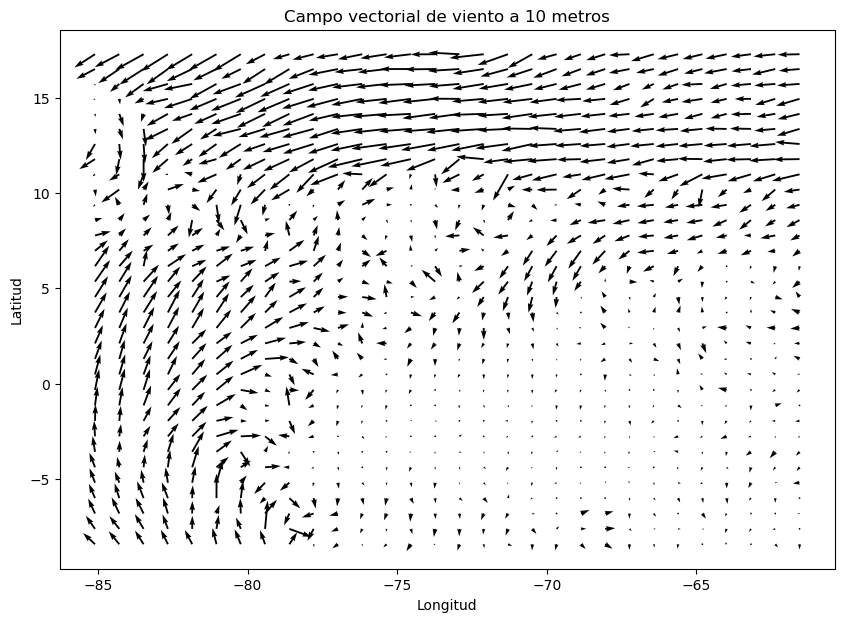

In [9]:
import numpy as np

# Seleccionar componentes U y V del viento a 10 m y el primer tiempo
u10 = ds["U10"].isel(Time=0)
v10 = ds["V10"].isel(Time=0)

# Submuestrear para evitar demasiados vectores en el gráfico (cada 10 puntos)
step = 10
u10_sub = u10[::step, ::step]
v10_sub = v10[::step, ::step]
lats_sub = lats[::step, ::step]
lons_sub = lons[::step, ::step]

plt.figure(figsize=(10,7))
plt.quiver(lons_sub, lats_sub, u10_sub, v10_sub)
plt.title("Campo vectorial de viento a 10 metros")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()



Mapa con croquis de una variable en superficie (Temperatura a 2 m con líneas de costa)

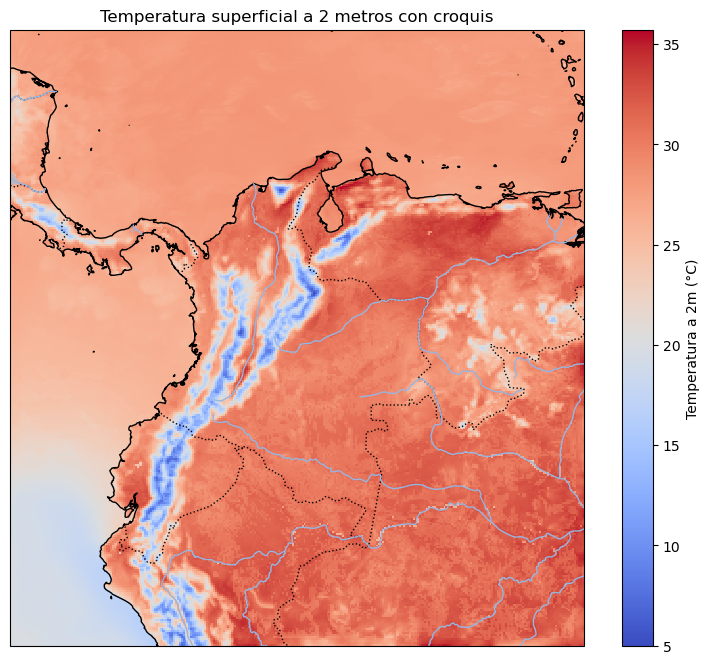

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Extraemos variable y coordenadas para primer tiempo
t2_c = ds["T2"].isel(Time=0) - 273.15  # Convertir a °C
lats = ds["XLAT"].isel(Time=0)
lons = ds["XLONG"].isel(Time=0)

fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection': ccrs.PlateCarree()})

# Graficar temperatura con pcolormesh
pcm = ax.pcolormesh(lons, lats, t2_c, cmap='coolwarm', shading='auto')

# Añadir elementos geográficos como líneas de costa y fronteras
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

plt.colorbar(pcm, ax=ax, label='Temperatura a 2m (°C)')
plt.title('Temperatura superficial a 2 metros con croquis')
plt.show()


Mapa a altura (Temperatura a 500 mb)

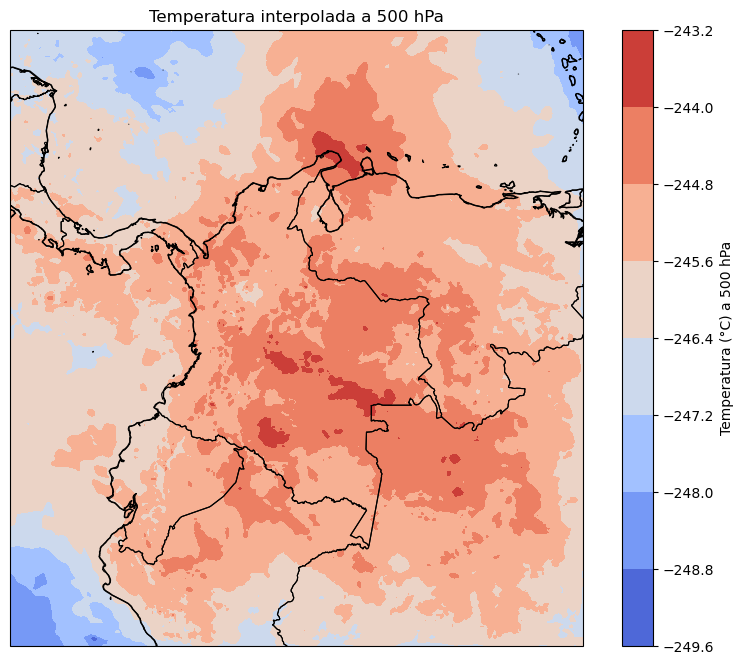

In [6]:
import numpy as np

# P y PB son las presiones del modelo: 
# P es la presión perturbada (variable dependiente del modelo)
# PB es la presión base (estado inicial en equilibrio hidrostático)
# Se suman para obtener la presión total en cada punto y nivel (en Pascales)
pres = ds["P"].isel(Time=0).values + ds["PB"].isel(Time=0).values

# Temperatura calculada por WRF a varios niveles verticales (en Kelvin)
temp = ds["T"].isel(Time=0).values

# pres y temp tienen dimensiones: niveles verticales x latitud x longitud
# Para facilitar la interpolación a un nivel particular (500 hPa),
# transformamos cada matriz 3D en 2D: (niveles, puntos espacializados)
levels = pres.shape[0]   # Número total de niveles verticales
gridsize = pres.shape[1] * pres.shape[2]  # Número total de puntos horizontales (lat*lon)
pres_2d = pres.reshape(levels, gridsize)
temp_2d = temp.reshape(levels, gridsize)

# Presión objetivo para interpolar: 500 hPa = 50000 Pascales
target_p = 50000

# Aquí creamos un arreglo vacío para guardar la temperatura interpolada en cada punto horizontal
temp_500 = np.empty(gridsize)

# Usando interpolación lineal para cada columna (cada punto espacial),
# invertimos el orden porque las presiones van de mayor a menor (de superficie a niveles altos)
for i in range(gridsize):
    temp_500[i] = np.interp(target_p, pres_2d[:, i][::-1], temp_2d[:, i][::-1])

# Volvemos a conformar la matriz 2D con dimensiones latitud x longitud y convertimos a °C
temp_500 = temp_500.reshape(pres.shape[1], pres.shape[2]) - 273.15  # °C

# Extraemos las lat/lon para graficar
lats = ds["XLAT"].isel(Time=0)
lons = ds["XLONG"].isel(Time=0)

# Graficamos con Cartopy mapa de contornos rellenos para la temperatura a 500 hPa
fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection': ccrs.PlateCarree()})
pcm = ax.contourf(lons, lats, temp_500, cmap="coolwarm")
ax.coastlines()
# Obtener fronteras de países
countries = cfeature.NaturalEarthFeature(category='cultural',
                                         name='admin_0_countries',
                                         scale='10m',
                                         facecolor='none')

ax.add_feature(countries, edgecolor='black', linewidth=0.8)

plt.colorbar(pcm, ax=ax, label="Temperatura (°C) a 500 hPa")
plt.title("Temperatura interpolada a 500 hPa")
plt.show()


### Colormaps (cmaps) para probar en Matplotlib / Xarray
Algunos cmaps comunes e interesantes para variables atmosféricas (pueden cambiar todo el look del mapa):

"coolwarm" (azul-rojo, divergiendo)

"viridis" (verde-amarillo, perceptualmente uniforme)

"plasma" (amarillo-rojo)

"inferno" (oscuro a amarillo)

"magma" (oscuro a rosado)

"cividis" (azul-amarillo con buen contraste)

"RdYlBu" (rojo-amarillo-azul, divergiendo)

"Blues" (sólo azules, bueno para precipitación)

"Greens" (rango verde)

"Spectral" (colorido, útil para anomalías)

### Proyecciones Cartopy para probar

ccrs.PlateCarree(): proyección equidistante simple, comumente usada para datos georeferenciados en lat-lon.

ccrs.Mercator(): proyección de Mercator, común en mapas web.

ccrs.LambertConformal(): proyección conforme, adecuada para regiones media latitud.

ccrs.Mollweide(): proyección global, buena para todo el mundo.

ccrs.Orthographic(): proyección esférica, vista desde el espacio, parecida a un globo.

ccrs.AlbersEqualArea(): proyección para conservación de áreas.

Skew-T (Perfil termodinámico)
Para hacer el skew-T es adecuado usar MetPy, con un perfil vertical extraído cerca de una ubicación. Aquí un ejemplo básico:

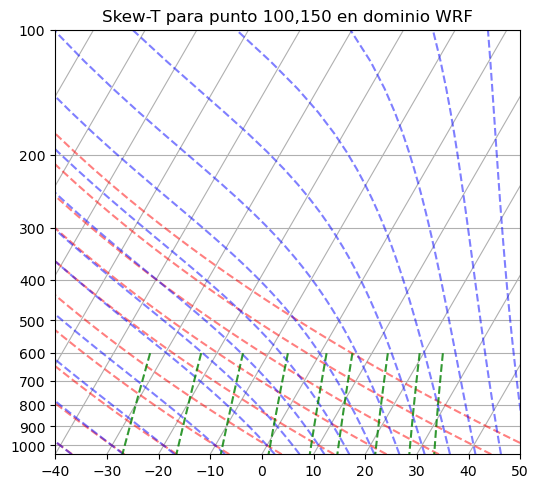

In [3]:
from metpy.plots import SkewT
import matplotlib.pyplot as plt

# Para hacer un perfil vertical, seleccionamos un punto en la grilla (ejemplo: south_north=100, west_east=150)
# Presión total (P + PB) convertida a hPa (/100)
pres_hpa = (ds["P"].isel(Time=0, south_north=100, west_east=150).values + 
            ds["PB"].isel(Time=0, south_north=100, west_east=150).values) / 100

# Temperatura en °C (Kelvin menos 273.15)
temp_c = ds["T"].isel(Time=0, south_north=100, west_east=150).values - 273.15

# Punto de rocío idealmente debería calcularse a partir de humedad (Q2), aquí omitido por simplicidad
# Si se dispone, puede añadirse cálculo usando MetPy u otras librerías

fig = plt.figure(figsize=(6,8))
skew = SkewT(fig)

# La gráfica requiere presiones invertidas (de superficie a altura), por eso [:,::-1] o similar
skew.plot(pres_hpa[::-1], temp_c[::-1], 'r')  # Temperatura en rojo

# Incorporar líneas termodinámicas para análisis
skew.plot_dry_adiabats() #Dibuja líneas de adiabáticas secas, que representan cambios de temperatura con altura sin condensación (vaporización).
skew.plot_moist_adiabats() #Dibuja líneas de adiabáticas húmedas, que indican el cambio de temperatura cuando el aire está saturado y hay condensación.
skew.plot_mixing_lines() #Traza líneas de mezcla, que muestran cómo cambia el contenido de vapor de agua en el aire con la presión.

plt.title("Skew-T para punto 100,150 en dominio WRF")
plt.show()
